In [1]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

In [2]:
date = '20220311'
dataNo = 1
scanNo = 2

In [3]:
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [4]:
param_name = 'A0154: OL (H1): AM for physics 1'
scan_param =3.4/4*np.exp((scan_data[param_name]-5.03)/0.646)
unique_param = scan_param.unique()
sample1 = unique_param[1]
sample2 = unique_param[4]
sample3 = unique_param[9]
# sample1 = unique_param[1]
# sample2 = unique_param[10]
# sample3 = unique_param[20]
unit = '[ER]'

fit_name = 'Temperature (x) @ ROI1 (uK)'
fit_param = scan_data[fit_name]

In [5]:
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat.tiff'))
    dark_files = list(Path(path_img).glob('seq*_dark.tiff'))
    update_files = list(Path(path_img).glob('seq*_update.tiff'))
else:
    print(No)

img_trans_sample1 = []
img_trans_sample2 = []
img_trans_sample3 = []
for N in range(len(scan_param)):
    if scan_param[N] == sample1:
        img_trans_sample1 += [np.array(Image.open(update_files[N]))]
    elif scan_param[N] == sample2:
        img_trans_sample2 += [np.array(Image.open(update_files[N]))]
    elif scan_param[N] == sample3:
        img_trans_sample3 += [np.array(Image.open(update_files[N]))]
img_trans_sample1 = np.average(img_trans_sample1,axis=0) 
img_trans_sample2 = np.average(img_trans_sample2,axis=0) 
img_trans_sample3 = np.average(img_trans_sample3,axis=0) 

Text(0.5, 1.0, 'A0154: OL (H1): AM for physics 1 = 13.9[ER]')

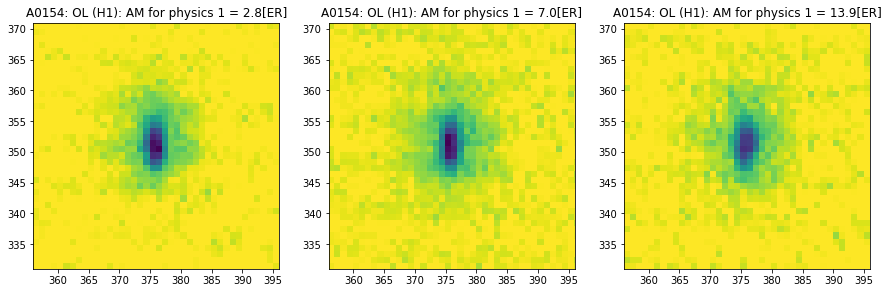

In [6]:
vmin = np.min(img_trans_sample2)
vmax = np.mean(img_trans_sample2)
xlim_1 = 356; xlim_2 = 396
ylim_1 = 331; ylim_2 = 371

fig =plt.figure(figsize=[15,10])
ax1 = fig.add_subplot(1,3,1)
mappable =ax1.pcolormesh(img_trans_sample1, vmin=vmin, vmax=vmax, shading='auto')
ax1.set_aspect('equal')
ax1.set_xlim(xlim_1,xlim_2)
ax1.set_ylim(ylim_1,ylim_2)
ax1.set_title(param_name+ " = %.01f"%(sample1)+unit)

ax2 = fig.add_subplot(1,3,2)
mappable =ax2.pcolormesh(img_trans_sample2, vmin=vmin, vmax=vmax, shading='auto')
ax2.set_aspect('equal')
ax2.set_xlim(xlim_1,xlim_2)
ax2.set_ylim(ylim_1,ylim_2)
ax2.set_title(param_name+" = %.01f"%(sample2)+unit)

ax3 = fig.add_subplot(1,3,3)
mappable =ax3.pcolormesh(img_trans_sample3, vmin=vmin, vmax=vmax, shading='auto')
ax3.set_aspect('equal')
ax3.set_xlim(xlim_1,xlim_2)
ax3.set_ylim(ylim_1,ylim_2)
ax3.set_title(param_name+ " = %.01f"%(sample3)+unit)

In [7]:
temp_list = []
temp_err_list = []
for i in range(len(unique_param)):
    temp_tmp = []
    for j in range(len(scan_param)):
        if scan_param[j] == unique_param[i]:
            temp_tmp.append(fit_param[j])
    temp_list.append(np.mean(temp_tmp))
    temp_err_list.append(np.std(temp_tmp))

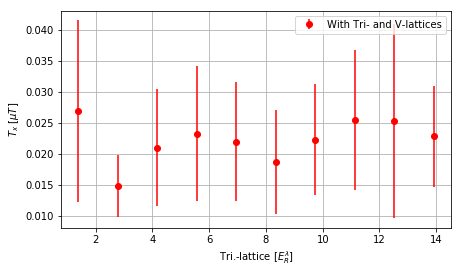

In [8]:
fig = plt.figure(figsize=[7,4])
ax1 = fig.add_subplot(111)
ax1.errorbar(unique_param,temp_list, temp_err_list,c='r', fmt='o', label = 'With Tri- and V-lattices')
ax1.set_xlabel(r'Tri.-lattice [$E_R^{\lambda}$]')
ax1.set_ylabel(r'$T_x$ [$\mu T$]')
ax1.grid()
ax1.legend()

In [9]:
date = '20220311'
dataNo = 2
scanNo = 3

In [10]:
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [11]:
fit_param = scan_data[fit_name]
temp_BEC = np.mean(fit_param)
temp_BEC_err = np.std(fit_param)

In [12]:
date = '20220311'
dataNo = 4
scanNo = 5

In [13]:
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [14]:
fit_param = scan_data[fit_name]
temp_Vlat = np.mean(fit_param)
temp_Vlat_err = np.std(fit_param)

In [15]:
date = '20220311'
dataNo = 3
scanNo = 4

In [16]:
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [17]:
param_name = 'A0154: OL (H1): AM for physics 1'
scan_param =3.4/4*np.exp((scan_data[param_name]-5.03)/0.646)
unique_param_2 = scan_param.unique()

In [18]:
fit_param = scan_data[fit_name]
temp_WOlat = np.mean(fit_param)
temp_WOlat_err = np.std(fit_param)

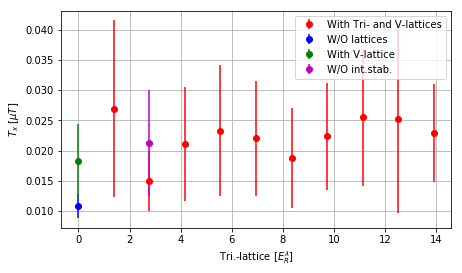

In [19]:
fig = plt.figure(figsize=[7,4])
ax1 = fig.add_subplot(111)
ax1.errorbar(unique_param,temp_list, temp_err_list,c='r', fmt='o', label = 'With Tri- and V-lattices')
ax1.errorbar(0, temp_BEC, temp_BEC_err, c='b', fmt='o', label = 'W/O lattices')
ax1.errorbar(0, temp_Vlat, temp_Vlat_err, c='g', fmt='o', label = 'With V-lattice')
ax1.errorbar(unique_param[1], temp_WOlat, temp_WOlat_err, c='m', fmt='o', label = 'W/O int.stab.')
ax1.set_xlabel(r'Tri.-lattice [$E_R^{\lambda}$]')
ax1.set_ylabel(r'$T_x$ [$\mu T$]')
ax1.grid()
ax1.legend()